# Segunda forma trigonométrica de la serie de Fourier
**Autor:** Martínez Torres Marcos Alfonso, Facultad de Ingeniería, UNAM

Licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

## Teoría

Partiendo de la forma compleja de la serie de Fourier:
$$
\begin{equation}
f_a(t)=\sum_{k=-N}^N\mathscr{D}_k\exp^{\frac{i2\pi kt}{T}}, \tag{7}
\end{equation}
$$
Podemos llegar a su segunda forma trigonométrica, que queda de la forma:
$$
fa(t) = \mathscr{A}_0 + \sum_{k=1}^N \left\{\mathscr{A}_kcos\left(\frac{2\pi kt}{T}\right)+\mathscr{B}_ksen\left(\frac{2\pi kt}{T}\right)\right\}
$$
donde<br><br>
$$\mathscr{A}_0 = \mathscr{D}_0$$
$$\mathscr{A}_k = \frac{2}{T}\int_{t_1}^{t_2}{f(t)cos\left(\frac{2\pi kt}{T}\right)}dt$$
$$\mathscr{B}_k = \frac{2}{T}\int_{t_1}^{t_2}{f(t)sen\left(\frac{2\pi kt}{T}\right)}dt$$


## Ejemplo



Dada $u(t) = t$ en $t\:\epsilon\:(-\pi,\pi)$, obtener su función aproximada mediante la serie de Fourier en su segunda forma trigonométrica

### Solución
Se importan las bibliotecas de Python
* *numpy* : Permite crear y gestionar arreglos multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel que operan sobre estos arreglos. El sitio oficial es https://numpy.org/
* *matplotlib* : Permite crear visualizaciones estáticas, animadas e interactivas en 2D y 3D. El sitio oficial es https://matplotlib.org/
* *scipy* : Es una colección de herramientas y algoritmos matemáticos para Python. Esta librería proporciona funciones para realizar integración numérica, es decir, calcular el valor numérico de una integral definida. La función *quad* se utiliza específicamente para calcular la integral numérica de una función en un intervalo definido. El sitio oficial es https://scipy.org/


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

Creamos la funcion original

In [2]:
def f(t):
    return t

Definimos los coeficientes de la serie de Fourier en su segunda forma trigonométrica

In [3]:
#A0
def A0(f):
    a0 = (1/T)*quad(f,-np.pi,np.pi)[0]
    return a0
#Ak
def Ak(f,k):
    Ak = (2/T)*quad(lambda t:f(t)*np.cos((2*np.pi*k*t)/T),-np.pi,np.pi)[0]
    return Ak
#Bk
def Bk(f,k):
    Bk = (2/T)*quad(lambda t:f(t)*np.sin((2*np.pi*k*t)/T),-np.pi,np.pi)[0]
    return Bk

Creamos una funcion que realice la serie de Fourier

In [4]:
#Serie de Fourier en su segunda forma trigonométrica
def SF_trigo2(f,N,t):
    a0 = A0(f)
    sumatoria = a0
    for k in range(1,N+1):
        ak = Ak(f,k)
        bk = Bk(f,k)
        sumatoria += (ak*np.cos((2*np.pi*k*t)/T))+(bk*np.sin((2*np.pi*k*t)/T))
    return sumatoria

Definimos ciertos parámetros

In [5]:
#Vector t
t = np.linspace(-np.pi,np.pi,200)
#Periodo
T = 2*np.pi
#La cantidad de coeficientes que se desee en la aproximación
N = int(input('Cantidad de coeficientes: '))

Creamos la función aproximada, con ayuda de la función que definimos antes

In [6]:
#Función aproximada
fa = SF_trigo2(f,N,t)
#La funcion SF_trigo2 depende de 
#(la funcion , la cantidad de coeficientes para su aproximación , el vector tiempo "t")

Graficamos y comparamos

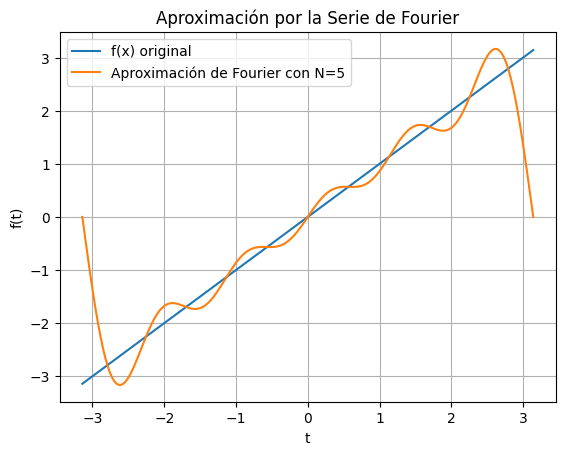

In [7]:
plt.plot(t, f(t), label='f(x) original')
plt.plot(t, fa, label=f'Aproximación de Fourier con N={N}')
plt.title('Aproximación por la Serie de Fourier')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()

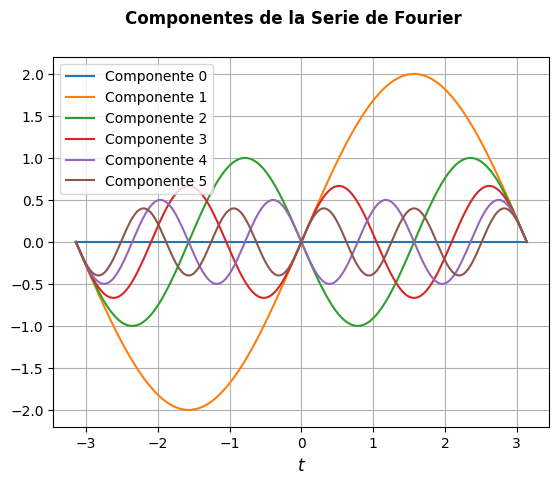

In [17]:
# Se crea la figura
fig = plt.figure()

# Primer coeficiente de la Serie de Fourier
a0 = A0(f)
plt.plot(t,a0*np.ones(t.size),label='Componente 0')
# Ciclo para el cálculo de los coeficientes
for k in range(1,N+1):
    # Aproximación de la función con la segunda forma trigonométrica
    ak = Ak(f,k)
    bk = Bk(f,k)
    ck = (ak*np.cos((2*np.pi*k*t)/T))+(bk*np.sin((2*np.pi*k*t)/T))
    
    # Se el k-ésimo componente de la Serie de Fourier
    plt.plot(t, ck, label=f'Componente {k}')

# Se edita la figura
plt.xlabel('$t$', fontsize=12)  # Se escribe la etiqueta del eje de la variable independiente en tamaño de letra 12
plt.suptitle('Componentes de la Serie de Fourier', weight='bold')  # Se escribe el título de la gráfica
plt.grid()  # Se grafica la cuadrícula
plt.legend()  # Se imprime la leyenda

# Mostrar la gráfica
plt.show()
